In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Read Data**

In [ ]:
import pandas as pd

In [ ]:
news_train=pd.read_excel('/content/drive/MyDrive/News_train.xlsx')

In [ ]:
news_train.shape

(5000, 2)

# **Preprocessing**

### **re**

In [ ]:
!pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pyarabic

In [ ]:
import re
import unicodedata
from pyarabic.araby import tokenize

def normalize_arabic(text):
    # Normalize Arabic text
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn') # remove diacritics
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub('/', ' ', text)
    text = re.sub('-', ' ', text)
    text = re.sub('_', ' ', text)
    text = re.sub(' و ', ' ', text)
    text = re.sub("'", ' ', text)
    text = re.sub("``", ' ', text)
    text = re.sub('"', ' ', text)
    text = re.sub('%', ' ', text)
    text = re.sub('»', ' ', text)
    text = re.sub('«', ' ', text)
    text = re.sub(r'\bال(\w+)\b', r'\1', text)
    text = re.sub(r'\bلل(\w+)\b', r'\1', text)
    text = re.sub(r'\bبال(\w+)\b', r'\1', text)
    text = re.sub(r'[A-Za-z0-9]', r'', text)#remove english characters
    text = re.sub(r'[0-9]', r'', text)#remove numbers
    text = re.sub(r'[^\w\s]', r'', text)#remove punctuation

    words = tokenize(text)

    normalized_text = ' '.join(words)

    return normalized_text

In [ ]:
news_train['News'] = news_train['News'].apply(normalize_arabic)

In [ ]:
news_train['News']

0       اشتباك حريري عون اتهامات لباسيل تمسك ثلث معطل ...
1                               عون حريري اصبح غريب اطوار
2       وزير خارجيه امريكي ندرس سحب كامل قواتنا من افغ...
3       افغانستان استعدادات حثيثه لاجتماع تركيا وكابل ...
4                   اندبندنت مفاوضات سريه كادت تنقذ قذافي
                              ...                        
4995                اوروبا تبدا احصاء خساير فيضانات مدمره
4996    قتل متظاهر رصاص خلال احتجاجات علي شح مياه في م...
4997    وسايل اعلام ايرانيه تتحدث عن اندلاع احتجاجات ف...
4998           مفاوضات افغانيه تتواصل في عاصمه قطريه دوحه
4999    تعليق مفاوضات افغانيه في دوحه موقتا لمزيد من م...
Name: News, Length: 5000, dtype: object

In [ ]:
news_train.shape

(5000, 2)

### **nltk**

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from pyarabic.araby import tokenize
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer

stemmer = ISRIStemmer()

def preprocess_text(text):
    # Tokenization for Arabic text using PyArabic's tokenize function
    tokens = tokenize(text)

    # Get Arabic stop words from NLTK
    stop_words_arabic = set(stopwords.words('arabic'))

    # Remove stop words
    arabic_tokens = [token for token in tokens if token not in stop_words_arabic]

    # Stemming Arabic text
    arabic_tokens = [stemmer.stem(token) for token in arabic_tokens]

    # Join tokens back into text
    processed_text = ' '.join(arabic_tokens)

    return processed_text

In [ ]:
preprocessed_documents_news_train = [preprocess_text(doc) for doc in news_train['News']]

In [ ]:
len(preprocessed_documents_news_train)

5000

# **Splitting the data into training and validation**

In [ ]:
news_train['processed_text'] = preprocessed_documents_news_train

In [ ]:
news_train['processed_text']

0                 شبك حرر عون تهم اسل تمس ثلث عطل بقء حكم
1                                    عون حرر اصبح غرب طور
2                     وزر خرج امر درس سحب كمل قوت غنس حلل
3       غنس عدد حثث جمع ترك كبل تهم طلب ركز علي حرب بد...
4                            اندبندنت فاض سره كدت نقذ قذف
                              ...                        
4995                             ورب تبد حصء خسير فيض دمر
4996      قتل ظاهر رصص خلل حجج علي شح ياه طقه جنب غرب اير
4997                          سيل علم يرن حدث دلع حجج شرع
4998                              فاض فغن وصل عصم قطر دوح
4999                          علق فاض فغن دوح وقت زيد شار
Name: processed_text, Length: 5000, dtype: object

In [ ]:
news_train.columns

Index(['Type', 'News', 'processed_text'], dtype='object')

In [ ]:
y=news_train['Type']
X=news_train.drop(columns=['Type', 'News'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
len(X_train)

4250

# **Word Embedding(FastText)**

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227140 sha256=df1a3d5d0d9489cf76eb53b03809332051ae008391a624fb6967953343fcd459
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
!wget "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz"
input_gz_file = '/content/cc.ar.300.bin.gz'
output_bin_file = 'cc.ar.300.bin'

--2024-06-12 04:49:03--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.183.33, 13.33.183.121, 13.33.183.115, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.183.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4500982519 (4.2G) [application/octet-stream]
Saving to: ‘cc.ar.300.bin.gz’

cc.ar.300.bin.gz    100%[===================>]   4.19G   118MB/s    in 43s     

2024-06-12 04:49:47 (98.7 MB/s) - ‘cc.ar.300.bin.gz’ saved [4500982519/4500982519]



In [ ]:
import gzip

def decompress_gz_to_bin(gz_file_path, bin_file_path):
    try:
        # Open the .gz file for reading
        with gzip.open(gz_file_path, 'rb') as gz_file:
            # Open or create the .bin file for writing
            with open(bin_file_path, 'wb') as bin_file:
                # Read chunks of data from the .gz file and write to the .bin file
                while True:
                    data = gz_file.read(1024)  # Read 1KB at a time
                    if not data:
                        break  # End of file
                    bin_file.write(data)
        print(f"Decompression successful: {gz_file_path} -> {bin_file_path}")
    except FileNotFoundError:
        print(f"Error: File not found: {gz_file_path}")
    except Exception as e:
        print(f"Error: {e}")

decompress_gz_to_bin(input_gz_file, output_bin_file)

Decompression successful: /content/cc.ar.300.bin.gz -> cc.ar.300.bin


In [ ]:
import fasttext

ft = fasttext.load_model(output_bin_file)#('cc.ar.300.bin')

In [ ]:
OOV_tokens = []
train_tokens = []
test_tokens = []
test_ft_embeddings = []

def get_doc1_vec(sent, model, i, data):
  tokens = sent.split()
  ft_embeddings = []
  for word in tokens:
    try:
      if data == 'train':
        ft_embeddings.append(model.get_word_vector(word))
        train_tokens.append(word)
      else:
        ft_embeddings.append(model.get_word_vector(word))
        test_tokens.append(word)
    except:
      #print(word, 'does not exist in the model.')
      OOV_tokens.append(word) #if found any -> go back to pre-processing the data
      continue
  if len(ft_embeddings) == 0:
    return None
  return sum(ft_embeddings)/len(ft_embeddings)

In [ ]:
X_train_ft_embeddings = X_train['processed_text'].apply(lambda sent: get_doc1_vec(sent, ft, None, 'train'))
X_test_ft_embeddings = X_test['processed_text'].apply(lambda sent: get_doc1_vec(sent, ft, None, 'test'))

In [ ]:
X_train_ft_embeddings_list = []
for embedding in X_train_ft_embeddings:
    if embedding is not None:
        X_train_ft_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_ft_embeddings_list.append(np.zeros_like(X_train_ft_embeddings[0]))

X_test_ft_embeddings_list = []
for embedding in X_test_ft_embeddings:
    if embedding is not None:
        X_test_ft_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_ft_embeddings_list.append(np.zeros_like(X_test_ft_embeddings[0]))


# **Models**

# **Traditional Models**

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_ft_embeddings_list, y_train)

y_pred = naive_bayes_classifier.predict(X_test_ft_embeddings_list)

accuracy_NB = accuracy_score(y_test, y_pred)
f1_NB = f1_score(y_test, y_pred,average='macro')
print('accuracy',accuracy_NB)
print('f1 score',f1_NB)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy 0.804
f1 score 0.6478578734765347
Classification Report:
              precision    recall  f1-score   support

    economic       0.67      0.63      0.65       134
    politics       0.87      0.87      0.87       488
       sport       0.77      0.76      0.76       120
        tech       0.22      0.50      0.31         8

    accuracy                           0.80       750
   macro avg       0.63      0.69      0.65       750
weighted avg       0.81      0.80      0.81       750



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
Decision_Tree_classifier = DecisionTreeClassifier()
Decision_Tree_classifier.fit(X_train_ft_embeddings_list, y_train)

y_pred = Decision_Tree_classifier.predict(X_test_ft_embeddings_list)

accuracy_DT = accuracy_score(y_test, y_pred)
f1_DT = f1_score(y_test, y_pred,average='macro')
print('accuracy',accuracy_DT)
print('f1 score',f1_DT)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy 0.632
f1 score 0.4360275774806836
Classification Report:
              precision    recall  f1-score   support

    economic       0.41      0.37      0.39       134
    politics       0.77      0.75      0.76       488
       sport       0.44      0.48      0.46       120
        tech       0.10      0.25      0.14         8

    accuracy                           0.63       750
   macro avg       0.43      0.46      0.44       750
weighted avg       0.64      0.63      0.64       750



# **Neural Language Models**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## **RNN (Recurrent Neural Networks)**

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
# Convert lists to NumPy arrays
X_train_ft_embeddings_array = np.array(X_train_ft_embeddings_list)
X_test_ft_embeddings_array = np.array(X_test_ft_embeddings_list)

label_mapping = {'economic': 0, 'politics': 1, 'sport': 2, 'tech': 3}

num_class = len(set(y_train))

# Encode the categorical labels into numerical format using the mapping
y_train_encoded_manual = np.array([label_mapping[label] for label in y_train])
y_test_encoded_manual = np.array([label_mapping[label] for label in y_test])

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded_manual, num_classes=num_class)
y_test_one_hot = to_categorical(y_test_encoded_manual, num_classes=num_class)

# Reshape the input data to add a timestep dimension
X_train_reshaped = X_train_ft_embeddings_array.reshape(-1, 1, X_train_ft_embeddings_array.shape[1])
X_test_reshaped = X_test_ft_embeddings_array.reshape(-1, 1, X_test_ft_embeddings_array.shape[1])

model = Sequential()

# Add SimpleRNN layer
model.add(SimpleRNN(units=64, input_shape=(1, X_train_ft_embeddings_array.shape[1])))

# Add output layer
model.add(Dense(units=num_class, activation='softmax'))

# Compile the model with categorical_crossentropy for one-hot encoded labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32)

# Predict probabilities for the test set
y_pred_probabilities = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred_encoded_manual = np.argmax(y_pred_probabilities, axis=1)


print("Classification Report:")
print(classification_report(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual))

accuracy_RNN = accuracy_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual)
f1_RNN = f1_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual,average='macro')
print('accuracy',accuracy_RNN)
print('f1 score',f1_RNN)


Epoch 1/10
133/133 [==============================] - 2s 3ms/step - loss: 0.9003 - accuracy: 0.6384
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7824
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.8339
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8515
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8621
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8701
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8725
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8791
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8845
Epoch 10/10
24/24 [==============================] - 0s 2ms/step
Classification Report:
            

## **LSTM (Long Short Term Memory)**

In [ ]:
from keras.layers import LSTM

In [ ]:
# Convert lists to NumPy arrays
X_train_ft_embeddings_array = np.array(X_train_ft_embeddings_list)
X_test_ft_embeddings_array = np.array(X_test_ft_embeddings_list)

label_mapping = {'economic': 0, 'politics': 1, 'sport': 2, 'tech': 3}

num_class = len(set(y_train))

# Encode the categorical labels into numerical format using the mapping
y_train_encoded_manual = np.array([label_mapping[label] for label in y_train])
y_test_encoded_manual = np.array([label_mapping[label] for label in y_test])

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded_manual, num_classes=num_class)
y_test_one_hot = to_categorical(y_test_encoded_manual, num_classes=num_class)

# Reshape the input data to add a timestep dimension
X_train_reshaped = X_train_ft_embeddings_array.reshape(-1, 1, X_train_ft_embeddings_array.shape[1])
X_test_reshaped = X_test_ft_embeddings_array.reshape(-1, 1, X_test_ft_embeddings_array.shape[1])

model = Sequential()

# Add LSTM layer
model.add(LSTM(units=64, input_shape=(1, X_train_ft_embeddings_array.shape[1])))

# Add output layer
model.add(Dense(units=num_class, activation='softmax'))

# Compile the model with categorical_crossentropy for one-hot encoded labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32)

# Predict probabilities for the test set
y_pred_probabilities = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred_encoded_manual = np.argmax(y_pred_probabilities, axis=1)

print("Classification Report:")
print(classification_report(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual))

accuracy_LSTM = accuracy_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual)
f1_LSTM = f1_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual,average='macro')
print('accuracy',accuracy_LSTM)
print('f1 score',f1_LSTM)


Epoch 1/10
133/133 [==============================] - 2s 4ms/step - loss: 1.0185 - accuracy: 0.6068
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.7414
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.8256
Epoch 4/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.8468
Epoch 5/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8560
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8656
Epoch 7/10
133/133 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8718
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8727
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8791
Epoch 10/10
24/24 [==============================] - 1s 3ms/step
Classification Report:
            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **GRU (Gate Recurrent Unit)**

In [ ]:
from keras.layers import GRU

In [ ]:
# Convert lists to NumPy arrays
X_train_ft_embeddings_array = np.array(X_train_ft_embeddings_list)
X_test_ft_embeddings_array = np.array(X_test_ft_embeddings_list)

label_mapping = {'economic': 0, 'politics': 1, 'sport': 2, 'tech': 3}

num_class = len(set(y_train))

# Encode the categorical labels into numerical format using the mapping
y_train_encoded_manual = np.array([label_mapping[label] for label in y_train])
y_test_encoded_manual = np.array([label_mapping[label] for label in y_test])

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded_manual, num_classes=num_class)
y_test_one_hot = to_categorical(y_test_encoded_manual, num_classes=num_class)

# Reshape the input data to add a timestep dimension
X_train_reshaped = X_train_ft_embeddings_array.reshape(-1, 1, X_train_ft_embeddings_array.shape[1])
X_test_reshaped = X_test_ft_embeddings_array.reshape(-1, 1, X_test_ft_embeddings_array.shape[1])

model = Sequential()

# Add GRU layer
model.add(GRU(units=64, input_shape=(1, X_train_ft_embeddings_array.shape[1])))

# Add output layer
model.add(Dense(units=num_class, activation='softmax'))

# Compile the model with categorical_crossentropy for one-hot encoded labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32)

# Predict probabilities for the test set
y_pred_probabilities = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred_encoded_manual = np.argmax(y_pred_probabilities, axis=1)

print("Classification Report:")
print(classification_report(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual))

accuracy_GRU = accuracy_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual)
f1_GRU= f1_score(y_test_one_hot.argmax(axis=1), y_pred_encoded_manual,average='macro')
print('accuracy',accuracy_GRU)
print('f1 score',f1_GRU)



Epoch 1/10
133/133 [==============================] - 3s 4ms/step - loss: 0.9734 - accuracy: 0.6113
Epoch 2/10
133/133 [==============================] - 1s 4ms/step - loss: 0.6681 - accuracy: 0.7584
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.8261
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.8546
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8626
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8666
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8734
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8776
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8826
Epoch 10/10
24/24 [==============================] - 0s 2ms/step
Classification Report:
            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Plot**

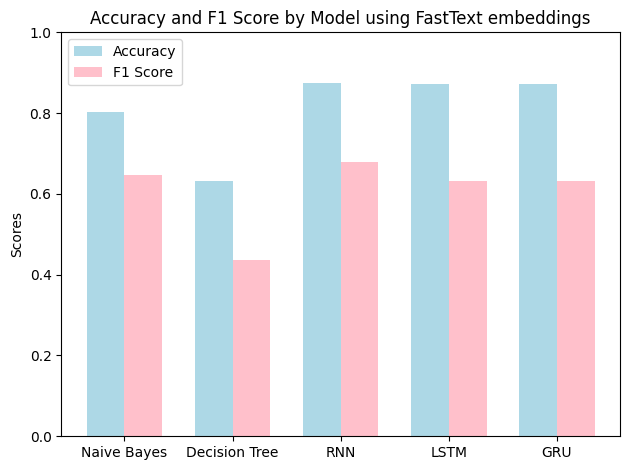

In [ ]:
import matplotlib.pyplot as plt
models = ['Naive Bayes', 'Decision Tree', 'RNN', 'LSTM', 'GRU']
accuracies = [accuracy_NB, accuracy_DT, accuracy_RNN, accuracy_LSTM, accuracy_GRU]
f1_scores = [f1_NB, f1_DT, f1_RNN, f1_LSTM, f1_GRU]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy',color='lightblue')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score',color='pink')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score by Model using FastText embeddings')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.set_ylim(0,1)
fig.tight_layout()
plt.show()